In [1]:
print("GOD HELP ME")

GOD HELP ME


In [ ]:
!pip install seaborn

In [2]:
# Requiire library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing the census data
df = pd.read_csv("insurance.csv")
df.head(n = 10)        #viewing the first 10 column

,age,sex,bmi,children,smoker,region,medicalCost
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
df.shape         #shape of the data

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   sex          1338 non-null   object 
 2   bmi          1338 non-null   float64
 3   children     1338 non-null   int64  
 4   smoker       1338 non-null   object 
 5   region       1338 non-null   object 
 6   medicalCost  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isnull().sum()*100/df.shape[0]      # checking for missing values

age            0.0
sex            0.0
bmi            0.0
children       0.0
smoker         0.0
region         0.0
medicalCost    0.0
dtype: float64

In [7]:
df.describe().T       #summary of the data

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
medicalCost,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [8]:
# Grouping AGE and BMI to enable some visualization
df_bmi = df.copy()
bmi_grouping = [0, 18.5, 24.9, 29.9, 34.9, 35]
bmi_labels = ['underweight', 'normal', 'overweight', 'obese', 'ext. obese']
df_bmi['weight_category'] = pd.cut(df_bmi.bmi, bmi_grouping, labels = bmi_labels, include_lowest = True)

In [9]:
df_age = df_bmi.copy()
age_grouping = [0, 18, 30, 45]
age_labels = ['young adult', 'middle aged adult', 'old adult']
df_age['age_range'] = pd.cut(df_age.age, age_grouping, labels = age_labels, include_lowest = True)

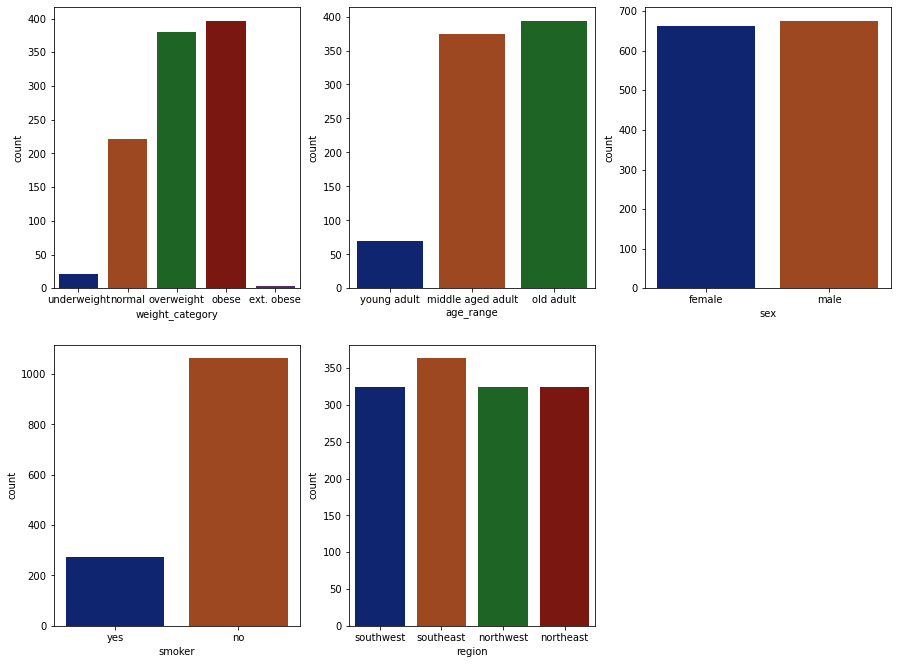

In [10]:
Groupings = ['weight_category', 'age_range', 'sex', 'smoker', 'region']
plt.figure(figsize = (15, 30))
for i in enumerate(Groupings):
    plt.subplot(5, 3, i[0]+1)
    sns.countplot(x = i[1], palette = 'dark', data = df_age)

<AxesSubplot:xlabel='sex', ylabel='medicalCost'>

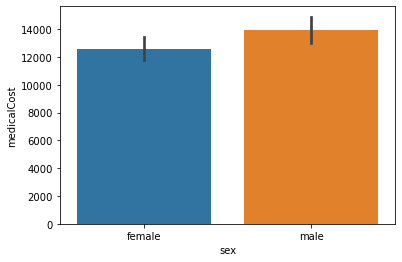

In [11]:
sns.barplot(x=df["sex"], y=df["medicalCost"])

In [12]:
w_percent = df_age['weight_category'].value_counts(normalize = True)
a_percent = df_age['age_range'].value_counts(normalize = True)
r_percent = df_age['region'].value_counts(normalize = True)
s_percent = df_age['sex'].value_counts(normalize = True)
sm_percent = df_age['smoker'].value_counts(normalize = True)
print(w_percent)
print(a_percent)
print(r_percent)
print(s_percent)
print(sm_percent)

obese          0.388454
overweight     0.371820
normal         0.216243
underweight    0.020548
ext. obese     0.002935
Name: weight_category, dtype: float64
old adult            0.470167
middle aged adult    0.447494
young adult          0.082339
Name: age_range, dtype: float64
southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: region, dtype: float64
male      0.505232
female    0.494768
Name: sex, dtype: float64
no     0.795217
yes    0.204783
Name: smoker, dtype: float64


<AxesSubplot:xlabel='medicalCost', ylabel='Density'>

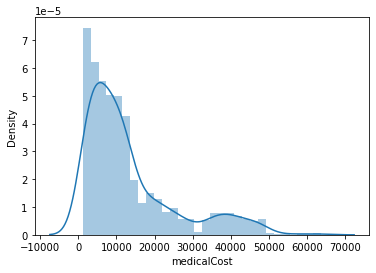

In [13]:
sns.distplot(df.medicalCost)

<AxesSubplot:xlabel='medicalCost', ylabel='age_range'>

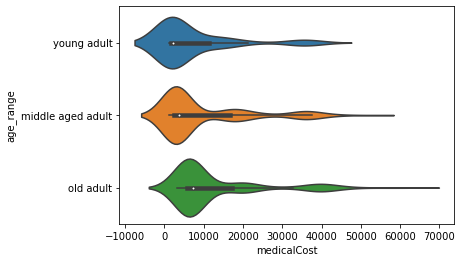

In [14]:
sns.violinplot(x=df_age["medicalCost"], y=df_age["age_range"])

In [15]:
# converting the strings to numbers
df['sex'] = df['sex'].apply({'male':0,'female':1}.get) 
df['smoker'] = df['smoker'].apply({'yes':1, 'no':0}.get)
df['region'] = df['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)
df.head()

,age,sex,bmi,children,smoker,region,medicalCost
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


### correlation 

In [16]:
corr = df.corr()      #correlation matrix of the insurance data
corr

,age,sex,bmi,children,smoker,region,medicalCost
age,1.000000,0.020856,0.109272,0.042469,-0.025019,-0.002127,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,0.004588,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,-0.157566,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.002181,0.787251
region,-0.002127,0.004588,-0.157566,-0.016569,0.002181,1.000000,0.006208
medicalCost,0.299008,-0.057292,0.198341,0.067998,0.787251,0.006208,1.000000


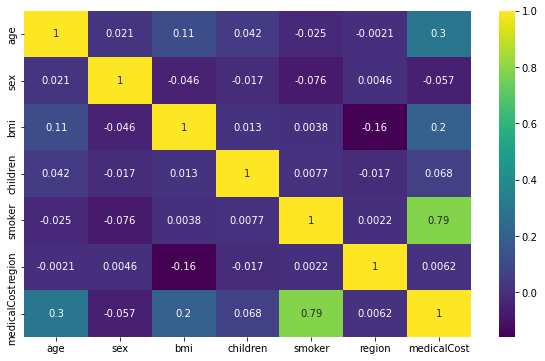

In [17]:
# heat map
plt.figure(figsize = (10, 6))
sns.heatmap(df.corr(), annot = True, cmap="viridis")
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


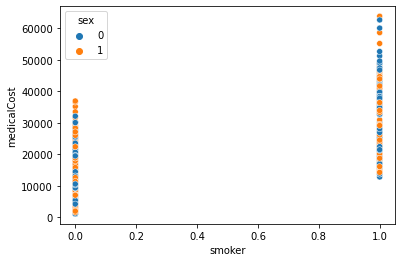

In [18]:
# Then three most correlatioed variable with medicalCost
# smoker; r = 0.79
# age;    r = 0.30
# bmi;    r = 0.20

#scatter plot of the various parameter
print(f"{(sns.scatterplot(df['smoker'], df['medicalCost'], hue=df['sex']))}")

AxesSubplot(0.125,0.125;0.775x0.755)


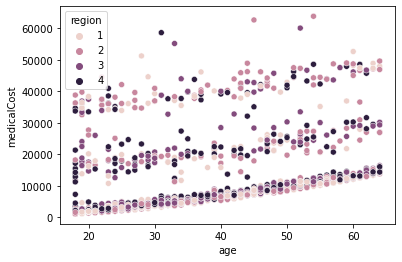

In [19]:
print(f"{(sns.scatterplot(df['age'], df['medicalCost'], hue=df['region']))}")

AxesSubplot(0.125,0.125;0.775x0.755)


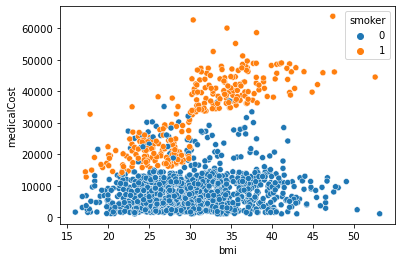

In [20]:
print(f"{(sns.scatterplot(df['bmi'], df['medicalCost'], hue=df['smoker']))}")

In [21]:
!pip install sklearn

  Using cached sklearn-0.0-py2.py3-none-any.whl


### simple linear regression

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

NameError: name 'x' is not defined

### defining the predictors (X) and the response variable (y)

In [ ]:
x = df.drop(['medicalCost'], axis = 1)
print(x)
y = df["medicalCost"]
print(y)

In [ ]:
!pip install statsmodels
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

#model1 = LinearRegression()       # calling the linear regression function
#model1.fit(x_train, y_train)      # fitting the model into train and test
#y_pred = model1.predict(x_test)   # getting the predicted variable
#print(y_pred)

In [ ]:
#from sklearn.metrics import r2_score
#r_sq = r2_score(y_test, y_pred)
#r_sq
#model1.score(x, y)

In [ ]:
#model1 = LinearRegression().fit(x,y)
#r_sq = model1.score(x, y)
#print(f"intercept: {model1.intercept_}")
#print(f"coefficients: {model1.coef_}")
#y_pred = model1.predict(x_test)

In [23]:
#model1.summary

### using smoker as the predictor and medicalCost as the response variable

In [24]:
#!pip install statsmodels
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
#import statsmodels.formula.api as sm

k = sm.add_constant(df['smoker'])
model1 = sm.OLS(df['medicalCost'], k).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:            medicalCost   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     2178.
Date:                Sat, 16 Jul 2022   Prob (F-statistic):          8.27e-283
Time:                        19:57:05   Log-Likelihood:                -13831.
No. Observations:                1338   AIC:                         2.767e+04
Df Residuals:                    1336   BIC:                         2.768e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8434.2683    229.014     36.829      0.0

### age as the predictor and medicalCost as the response variable

In [25]:
k = sm.add_constant(df['age'])
model2 = sm.OLS(df['medicalCost'], k).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:            medicalCost   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     131.2
Date:                Sat, 16 Jul 2022   Prob (F-statistic):           4.89e-29
Time:                        19:57:08   Log-Likelihood:                -14415.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1336   BIC:                         2.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3165.8850    937.149      3.378      0.0

### bmi as the predictor and medicalCost as the response variable

In [26]:
k = sm.add_constant(df['bmi'])
model3 = sm.OLS(df['medicalCost'], k).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:            medicalCost   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     54.71
Date:                Sat, 16 Jul 2022   Prob (F-statistic):           2.46e-13
Time:                        19:57:10   Log-Likelihood:                -14451.
No. Observations:                1338   AIC:                         2.891e+04
Df Residuals:                    1336   BIC:                         2.892e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1192.9372   1664.802      0.717      0.4

### combining the three highly correlated variables with medicalCost to perform a multiple regression

In [27]:
x = df[["smoker", "age", "bmi"]]
y = df[["medicalCost"]]

k = sm.add_constant(x)
model = sm.OLS(y, k).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            medicalCost   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1316.
Date:                Sat, 16 Jul 2022   Prob (F-statistic):               0.00
Time:                        19:57:11   Log-Likelihood:                -13557.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1334   BIC:                         2.714e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.168e+04    937.569    -12.454      0.0

### performing multiple regression with all the predictors variable

In [28]:
x = df.drop(['medicalCost'], axis = 1)
y = df["medicalCost"]

k = sm.add_constant(x)
model = sm.OLS(y, k).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            medicalCost   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.1
Date:                Sat, 16 Jul 2022   Prob (F-statistic):               0.00
Time:                        19:57:13   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.336e+04   1087.672    -12.284      0.0

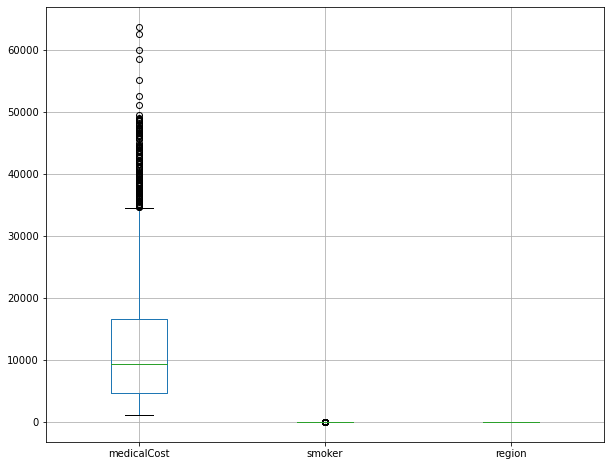

In [29]:
# Boxplot showing outliers
box_plot = df[['medicalCost', 'smoker', 'region']].boxplot(figsize=(10, 8))

## Two way anova

In [30]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# does the mean of smokers and the regions they live statistically significant with their medicalCost???

mod = ols('medicalCost ~ smoker + region', data = df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq      df            F         PR(>F)
smoker    1.215163e+11     1.0  2176.035876  1.328947e-282
region    3.955518e+06     1.0     0.070833   7.901690e-01
Residual  7.455036e+10  1335.0          NaN            NaN


# PART 2

In [31]:
df_cen = pd.read_csv("CensusDB.csv")    # loading the data
df_cen.head(n = 10)          # viewing the first 10 row

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,Male,0,3004,60,?,>50K


In [32]:
df_cen.shape   # shape of the data

(32561, 14)

In [33]:
#Renaming the column names
df_cen = df_cen.rename(columns = {"education-num":"education_num", 
                    "marital-status":"marital_status","capital-gain":"capital_gain", 
                    "capital-loss": "capital_loss", "hours-per-week":"hours_per_week",
                    "native-country":"native_country"})

In [34]:
df_cen.info()   # structure of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   sex             32561 non-null  object
 9   capital_gain    32561 non-null  int64 
 10  capital_loss    32561 non-null  int64 
 11  hours_per_week  32561 non-null  int64 
 12  native_country  32561 non-null  object
 13  income          32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [35]:
df_cen.isnull().sum()*100/df_cen.shape[0]   # checking for missing values

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education_num     0.0
marital_status    0.0
occupation        0.0
relationship      0.0
sex               0.0
capital_gain      0.0
capital_loss      0.0
hours_per_week    0.0
native_country    0.0
income            0.0
dtype: float64

In [36]:
df_nan = df_cen.replace("?", np.nan)
df_nan.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,United-States,<=50K


In [37]:
# replacing all the categorical nan with their corresponding most-frequent value(mode)
df = df_nan.fillna(df_nan.mode().iloc[0])

In [38]:
df.isnull().sum()*100/df.shape[0]   # checking for missing values

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education_num     0.0
marital_status    0.0
occupation        0.0
relationship      0.0
sex               0.0
capital_gain      0.0
capital_loss      0.0
hours_per_week    0.0
native_country    0.0
income            0.0
dtype: float64

In [39]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,United-States,<=50K


In [40]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


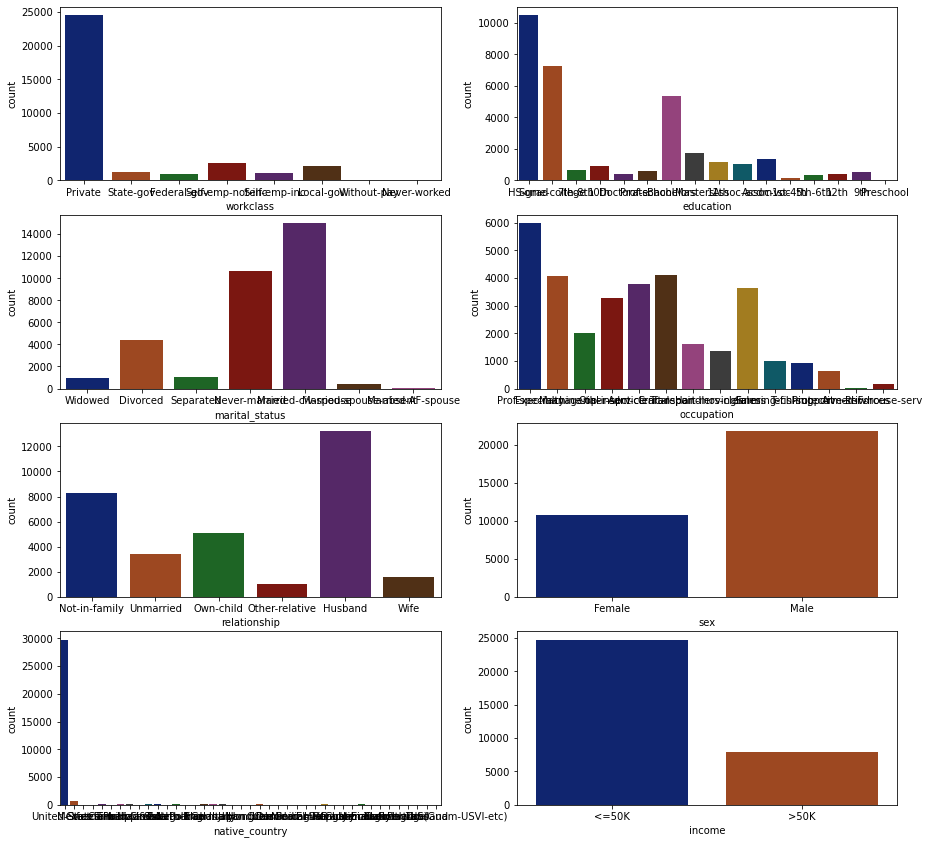

In [41]:
Groupings = ['workclass', 'education', 'marital_status', 'occupation',
             'relationship', 'sex', 'native_country', 'income']
plt.figure(figsize = (15, 30))
for i in enumerate(Groupings):
    plt.subplot(8, 2, i[0]+1)
    sns.countplot(x = i[1], palette = 'dark', data = df)

In [42]:
#p = df[["sex", "workclass", "relationship"]].groupby(["income"]).BMI.hours_per_week()
#p
#p.plot.bar()

### Exploring the census data

In [43]:
df['sex'] = np.where(df['sex'] == ' Male', 1, 0)

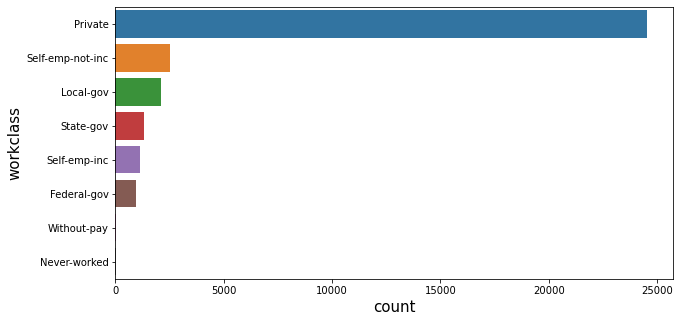

In [44]:
workclass_label = df.workclass.value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(workclass_label, workclass_label.index);
plt.ylabel('workclass', fontsize=15);
plt.xlabel('count', fontsize=15);

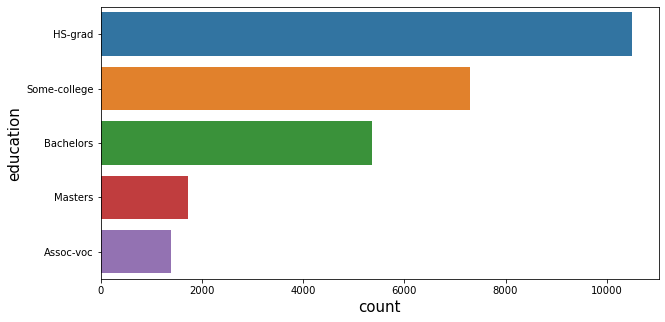

In [45]:
edu_label = df.education.value_counts()[:5]
plt.figure(figsize=(10, 5))
sns.barplot(edu_label, edu_label.index);
plt.ylabel('education', fontsize=15);
plt.xlabel('count', fontsize=15);

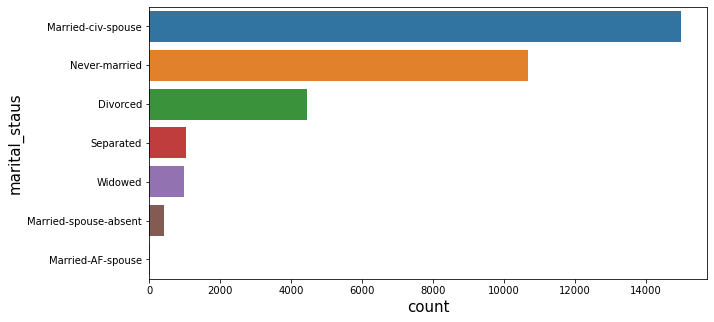

In [46]:
ms_label = df.marital_status.value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(ms_label, ms_label.index);
plt.ylabel('marital_staus', fontsize=15);
plt.xlabel('count', fontsize=15);

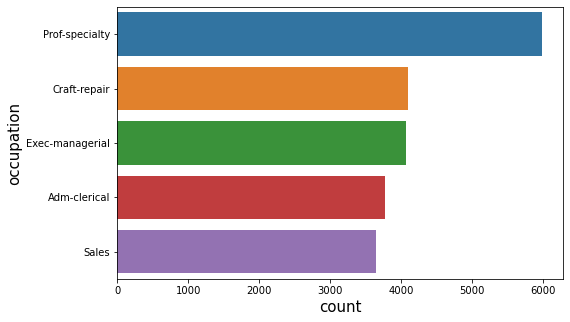

In [47]:
occ_label = df.occupation.value_counts()[:5]
plt.figure(figsize=(8, 5))
sns.barplot(occ_label, occ_label.index);
plt.ylabel('occupation', fontsize=15);
plt.xlabel('count', fontsize=15);

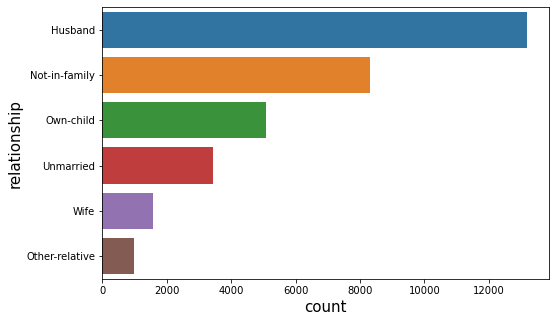

In [48]:
rel_label = df.relationship.value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(rel_label, rel_label.index);
plt.ylabel('relationship', fontsize=15);
plt.xlabel('count', fontsize=15);

In [49]:
r_label = native_country.value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(r_label, r_label.index);
plt.ylabel('native_country', fontsize=15);
plt.xlabel('count', fontsize=15);

NameError: name 'native_country' is not defined

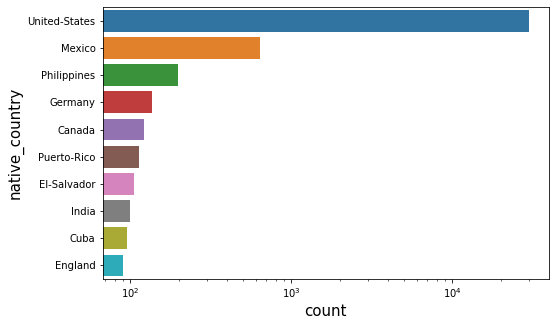

In [50]:
nc_label = df.native_country.value_counts()[:10]
plt.figure(figsize=(8, 5))
sns.barplot(nc_label, nc_label.index, log=True);
plt.ylabel('native_country', fontsize=15);
plt.xlabel('count', fontsize=15);

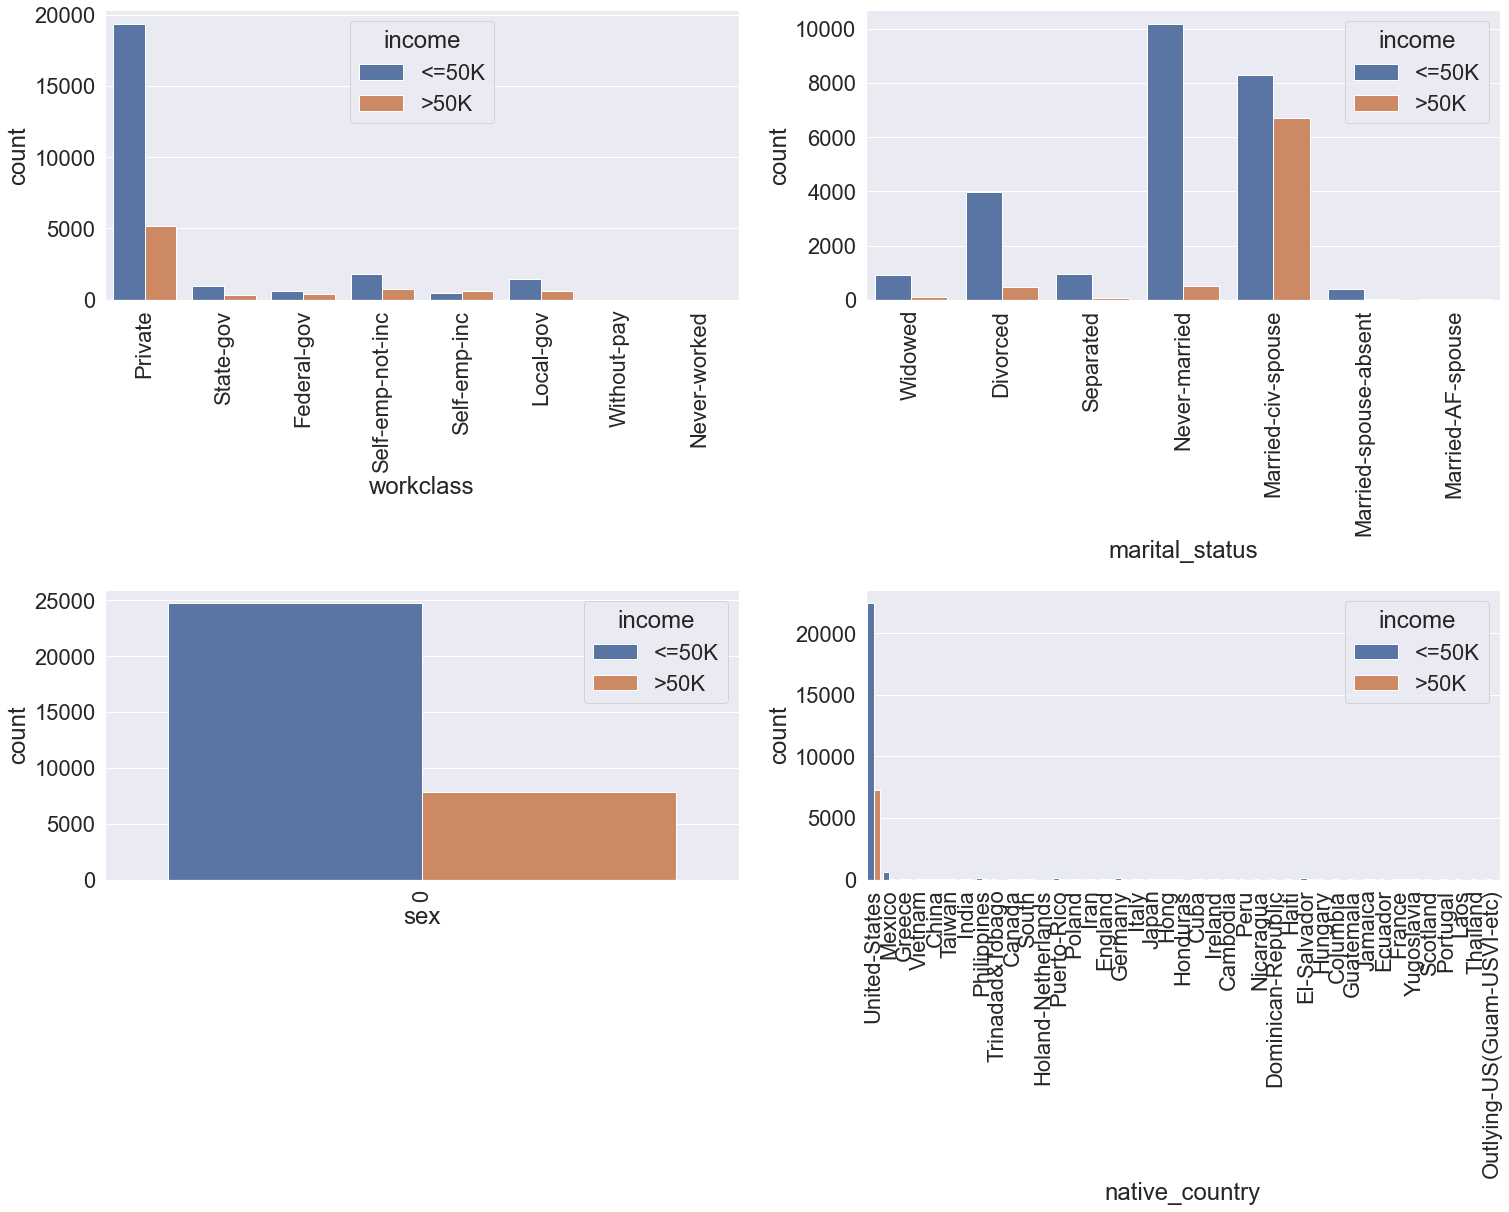

In [51]:
#plot
sns.set(font_scale=2)
plt.figure(figsize=(25,16)) 
#plt.rcParams.update({'font.size': 20}) 
plt.subplot(221)
sns.countplot(df["workclass"],hue=df["income"])
plt.xticks(rotation=90) 

plt.subplot(222)
sns.countplot(df["marital_status"],hue=df["income"])
plt.xticks(rotation=90)

plt.subplot(223)
sns.countplot(df["sex"],hue=df["income"])
plt.xticks(rotation=90)

plt.subplot(224)
sns.countplot(df["native_country"],hue=df["income"])
plt.xticks(rotation=90)

plt.subplots_adjust(hspace=1) 
plt.show()

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   sex             32561 non-null  int32 
 9   capital_gain    32561 non-null  int64 
 10  capital_loss    32561 non-null  int64 
 11  hours_per_week  32561 non-null  int64 
 12  native_country  32561 non-null  object
 13  income          32561 non-null  object
dtypes: int32(1), int64(6), object(7)
memory usage: 3.4+ MB


In [53]:
df.value_counts()

age  workclass         fnlwgt  education     education_num  marital_status      occupation         relationship   sex  capital_gain  capital_loss  hours_per_week  native_country  income
25   Private           195994  1st-4th       2              Never-married       Priv-house-serv    Not-in-family  0    0             0             40              Guatemala       <=50K     3
38   Private           207202  HS-grad       9              Married-civ-spouse  Machine-op-inspct  Husband        0    0             0             48              United-States   >50K      2
19   Private           97261   HS-grad       9              Never-married       Farming-fishing    Not-in-family  0    0             0             40              United-States   <=50K     2
46   Private           173243  HS-grad       9              Married-civ-spouse  Craft-repair       Husband        0    0             0             40              United-States   <=50K     2
                       133616  Some-college  10   

In [54]:
from pandas.api.types import CategoricalDtype  
df["sex"]=df["sex"].astype(CategoricalDtype(ordered=True)) 
df["sex"].head(n = 20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: sex, dtype: category
Categories (1, int64): [0]

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

 ## ANN

NameError: name 'tf' is not defined

## copying the data

In [57]:
df_copy = df.copy()    #copying the original dataframe
df_copy.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,0,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,0,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,0,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,0,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,0,0,3900,40,United-States,<=50K


In [58]:
df_copy["workclass"].value_counts()
#f["education"].value_counts()
#df_copy["marital-status"].value_counts()
#df_copy["occupation"].value_counts()
#f["relationship"].value_counts()
#print(f'{df_copy["sex"].value_counts()}')
#print(f'{df_copy["native-country"].value_counts()}')
#f["income"].value_counts()

Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [59]:
#Reschaling the factors of our variable

df_copy.workclass = pd.Categorical(df_copy.workclass)
df_copy['workclass'] = df_copy.workclass.cat.codes

df_copy.education = pd.Categorical(df_copy.education)
df_copy['education'] = df_copy.education.cat.codes

df_copy.marital_status = pd.Categorical(df_copy.marital_status)
df_copy['marital_status'] = df_copy.marital_status.cat.codes

df_copy.occupation = pd.Categorical(df_copy.occupation)
df_copy['occupation'] = df_copy.occupation.cat.codes

df_copy.relationship = pd.Categorical(df_copy.relationship)
df_copy['relationship'] = df_copy.relationship.cat.codes

df_copy.sex = pd.Categorical(df_copy.sex)
df_copy['sex'] = df_copy.sex.cat.codes

df_copy.native_country = pd.Categorical(df_copy.native_country)
df_copy['native_country'] = df_copy.native_country.cat.codes

df_copy.income = pd.Categorical(df_copy.income)
df_copy['income'] = df_copy.income.cat.codes

In [60]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [61]:
df_copy

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,3,77053,11,9,6,9,1,0,0,4356,40,38,0
1,82,3,132870,11,9,6,3,1,0,0,4356,18,38,0
2,66,3,186061,15,10,6,9,4,0,0,4356,40,38,0
3,54,3,140359,5,4,0,6,4,0,0,3900,40,38,0
4,41,3,264663,15,10,5,9,3,0,0,3900,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,3,310152,15,10,4,10,1,0,0,0,40,38,0
32557,27,3,257302,7,12,2,12,5,0,0,0,38,38,0
32558,40,3,154374,11,9,2,6,0,0,0,0,40,38,1
32559,58,3,151910,11,9,6,0,4,0,0,0,40,38,0


In [62]:
df_copy.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,3,77053,11,9,6,9,1,0,0,4356,40,38,0
1,82,3,132870,11,9,6,3,1,0,0,4356,18,38,0
2,66,3,186061,15,10,6,9,4,0,0,4356,40,38,0
3,54,3,140359,5,4,0,6,4,0,0,3900,40,38,0
4,41,3,264663,15,10,5,9,3,0,0,3900,40,38,0


In [63]:
X = df_copy.drop(["education_num", "income"], axis = 1)
y = df_copy.income      # response variable

In [64]:
# scaling the data

from sklearn.preprocessing import MinMaxScaler   #using MinMaxScaler
normMin = MinMaxScaler()

X_scaled = normMin.fit_transform(X)
#pd.DataFrameataFrame(X_scaled)

In [65]:
# spliting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 25)

### Logistics Regression 

In [66]:
#performing PCA
# pca is a process of figuring out the most important features or pc that has the most impact on the target variable 
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_model.score(X_test, y_test)

0.7933364041148472

# Principal Component Analysis

In [67]:
from sklearn.decomposition import PCA

pca = PCA(0.99)   #This 0.95 is instruction PCA to retain 99% of useful features and create new dimensions.

X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(32561, 11)

In [68]:
pca.explained_variance_ratio_       #The ratio the pca is explaining

array([0.25843147, 0.21174177, 0.15005886, 0.13264517, 0.06529609,
       0.0560108 , 0.05117985, 0.03207897, 0.01913553, 0.01203358,
       0.01138791])

In [69]:
X_scaled.shape

(32561, 12)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2, random_state = 100)

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression()

In [71]:
y_pred = LogReg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [72]:
a = pd.DataFrame({"Actual value": y_test, "Predicted value": y_pred})
a.head()

,Actual value,Predicted value
27144,0,0
11743,1,0
4306,0,0
19590,0,0
24990,0,0


### Model Performance

In [73]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      4920
           1       0.71      0.28      0.40      1593

    accuracy                           0.80      6513
   macro avg       0.76      0.62      0.64      6513
weighted avg       0.78      0.80      0.76      6513



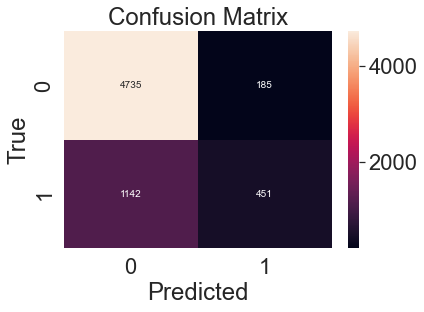

In [74]:
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
print(classification_report(y_test, y_pred))

### optimization of Logistics Regression

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      4920
           1       0.71      0.28      0.40      1593

    accuracy                           0.80      6513
   macro avg       0.76      0.62      0.64      6513
weighted avg       0.78      0.80      0.76      6513



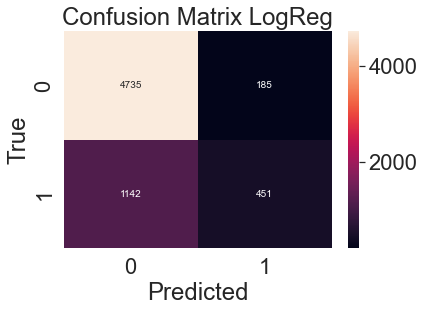

In [75]:
#multi_class="ovr",solver="lbfgs", C=100)    # “liblinear”, “newton-cg”, “lbfgs”, “sag” and “saga”:
LogReg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
LogReg.fit(X_train, y_train)

matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title("Confusion Matrix LogReg")
plt.xlabel("Predicted")
plt.ylabel("True")
print(classification_report(y_test, y_pred))

In [76]:
print("Number of mislabelled points out of the total %d points : %d"
     % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabelled points out of the total 6513 points : 1327


# Naive Bayes Algorithm

In [77]:
#X = df_copy.drop(["education_num", "income"], axis = 1)
y = df_copy.income  
X_pca = pca.fit_transform(X_scaled)

In [78]:
# performing Naive bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
model = GaussianNB()

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2, random_state = 100)
model.fit(X_train, y_train)

GaussianNB()

In [80]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

Text(20.5, 0.5, 'Predicted label')

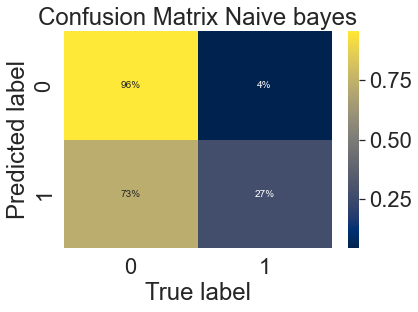

In [81]:
#confusion matrix
from sklearn.metrics import confusion_matrix

# Create the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred, normalize="true")

# Plot the confusion matrix
sns.heatmap(conf_mat, annot=True, fmt=".0%", cmap="cividis")
plt.title("Confusion Matrix Naive bayes")
plt.xlabel("True label")
plt.ylabel("Predicted label")

In [82]:
metrics.accuracy_score(y_test, y_pred)

0.7899585444495624

In [83]:
print("Number of mislabelled points out of the total %d points : %d"
     % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabelled points out of the total 6513 points : 1368


# k-nearest neighbors algorithm

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

#'''What is KNN?
#K-Nearest Neighbors is one of the simplest supervised machine learning algorithms used for 
#classification. It classifies a data point based on its neighbors’ classifications. 
#It stores all available cases 
#and classifies new cases based on similar features.

#When Do We Use the KNN Algorithm?
#The KNN algorithm is used in the following scenarios:
#✅Data is labeled

#✅KNN Algorithm Uses in Real World
#In the real world, the KNN algorithm has applications for both classification and regression problems. 
#KNN is widely used in almost all industries, such as healthcare, financial services, eCommerce, political campaigns, etc. 
#Healthcare companies use the KNN algorithm to determine if a patient is susceptible to certain diseases and conditions. 
#Financial institutions predict credit card ratings or qualify loan applications and the likelihood of default with the help of the KNN algorithm.'''

In [162]:
#X = df_copy.drop(["education_num", "income"], axis = 1)
y = df_copy.income  
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2, random_state = 100)

In [163]:
import math
math.sqrt(len(y_test))       # getting the odd numbers of neighbors

80.7031597894407

In [87]:
# Defiining the model: K-NN
classifier = KNeighborsClassifier(n_neighbors=81, p=2, metric='euclidean')
classifier

KNeighborsClassifier(metric='euclidean', n_neighbors=81)

In [88]:
# Fit Model
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=81)

In [89]:
#predictiing the test set
y_pred = classifier.predict(X_test)
y_pred

#Evaluating the model using confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f1_score(y_test, y_pred))

[[4494  426]
 [ 724  869]]
0.6018005540166206


In [90]:
accuracy_score(y_test, y_pred)

0.8234300629510211

Text(20.5, 0.5, 'Predicted label')

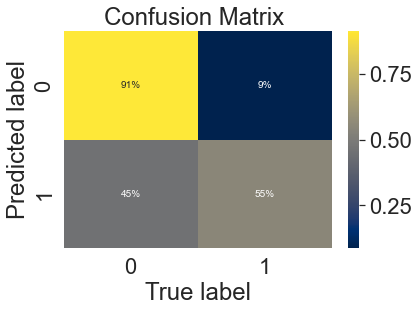

In [91]:
#confusion matrix
from sklearn.metrics import confusion_matrix

# Create the confusion matrix
CM = confusion_matrix(y_test, y_pred, normalize="true")

# Plot the confusion matrix
sns.heatmap(CM, annot=True, fmt=".0%", cmap="cividis")
plt.title("Confusion Matrix ")
plt.xlabel("True label")
plt.ylabel("Predicted label")

In [92]:
metrics.accuracy_score(y_test, y_pred)

0.8234300629510211

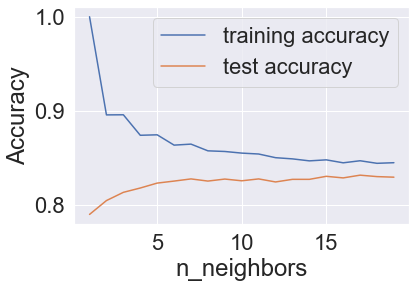

In [93]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 80
neighbors_settings = range(1, 20)
for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [94]:
print("fig1 Comparison of training and test accuracy as a function of n_neighbors,
The plot shows the training and test set accuracy on the y-axis against the setting of
n_neighbors on the x-axis. While real-world plots are rarely very smooth, we can still
recognize some of the characteristics of overfitting and underfitting (note that
because considering fewer neighbors corresponds to a more complex model, the plot
is horizontally flipped relative to the illustration in Figure 2-1). Considering a single
nearest neighbor, the prediction on the training set is perfect. But when more neighbors
are considered, the model becomes simpler and the training accuracy drops. The
test set accuracy for using a single neighbor is lower than when using more neighbors,
indicating that using the single nearest neighbor leads to a model that is too
complex. On the other hand, when considering 10 neighbors, the model is too simple
and performance is even worse. The best performance is somewhere in the middle,
using around six neighbors. Still, it is good to keep the scale of the plot in mind. The
worst performance is around 88% accuracy, which might still be acceptable.")

SyntaxError: EOL while scanning string literal (Temp/ipykernel_17608/2264808445.py, line 1)

### Hyperparameter tuning of KNN

In [95]:
from sklearn.model_selection import GridSearchCV


#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,81))
p=[1,2]

#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

#Create new KNN object
knn_tune = KNeighborsClassifier()

#Use GridSearch
clf = GridSearchCV(knn_tune, hyperparameters, cv=10)

#Fit the model
best_model = clf.fit(X_train, y_train)

#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

KeyboardInterrupt: 

# Decision Tree

In [96]:
#X = df_copy.drop(["education_num", "income"], axis = 1)
X = df_copy.drop(["education_num", "income"], axis = 1)
y = df_copy.income      # response variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [97]:
# Create Decision Tree classifer object

from sklearn import tree
D_tree = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = 4) #ccp_alpha=0.01)     # criterion = "entropy", max_depth = 3,entropy, gini
D_tree = D_tree.fit(X_train, y_train)
D_tree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [98]:
# Predict the category for the testing set
y_pred = D_tree.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [99]:
# model accuracy

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8154460310148933


<AxesSubplot:>

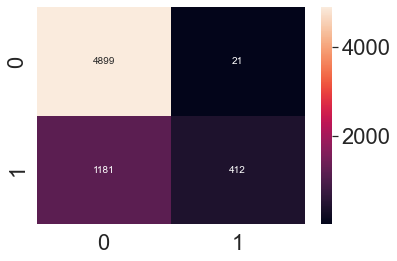

In [100]:
# confusion matrix

from sklearn.metrics import classification_report, confusion_matrix
mat = confusion_matrix(y_test, y_pred)
mat

import seaborn as sns
sns.heatmap(mat, annot=True, fmt = "d")

In [101]:
# feature importance

feature_names = X.columns
D_tree.feature_importances_
feature_importance = pd.DataFrame(D_tree.feature_importances_, index=feature_names)
feature_importance

,0
age,0.006887
workclass,0.000000
fnlwgt,0.001664
education,0.058146
marital_status,0.000502
occupation,0.000000
relationship,0.546119
sex,0.000000
capital_gain,0.291535
capital_loss,0.047485


<AxesSubplot:>

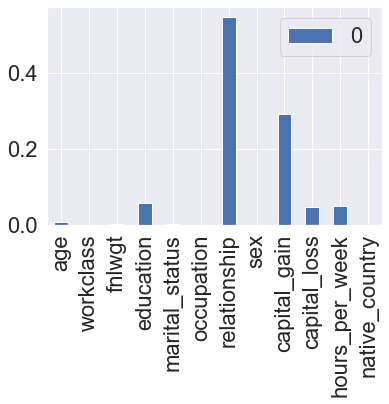

In [102]:
# plot of feature importance 
feature_importance.plot(kind="bar")

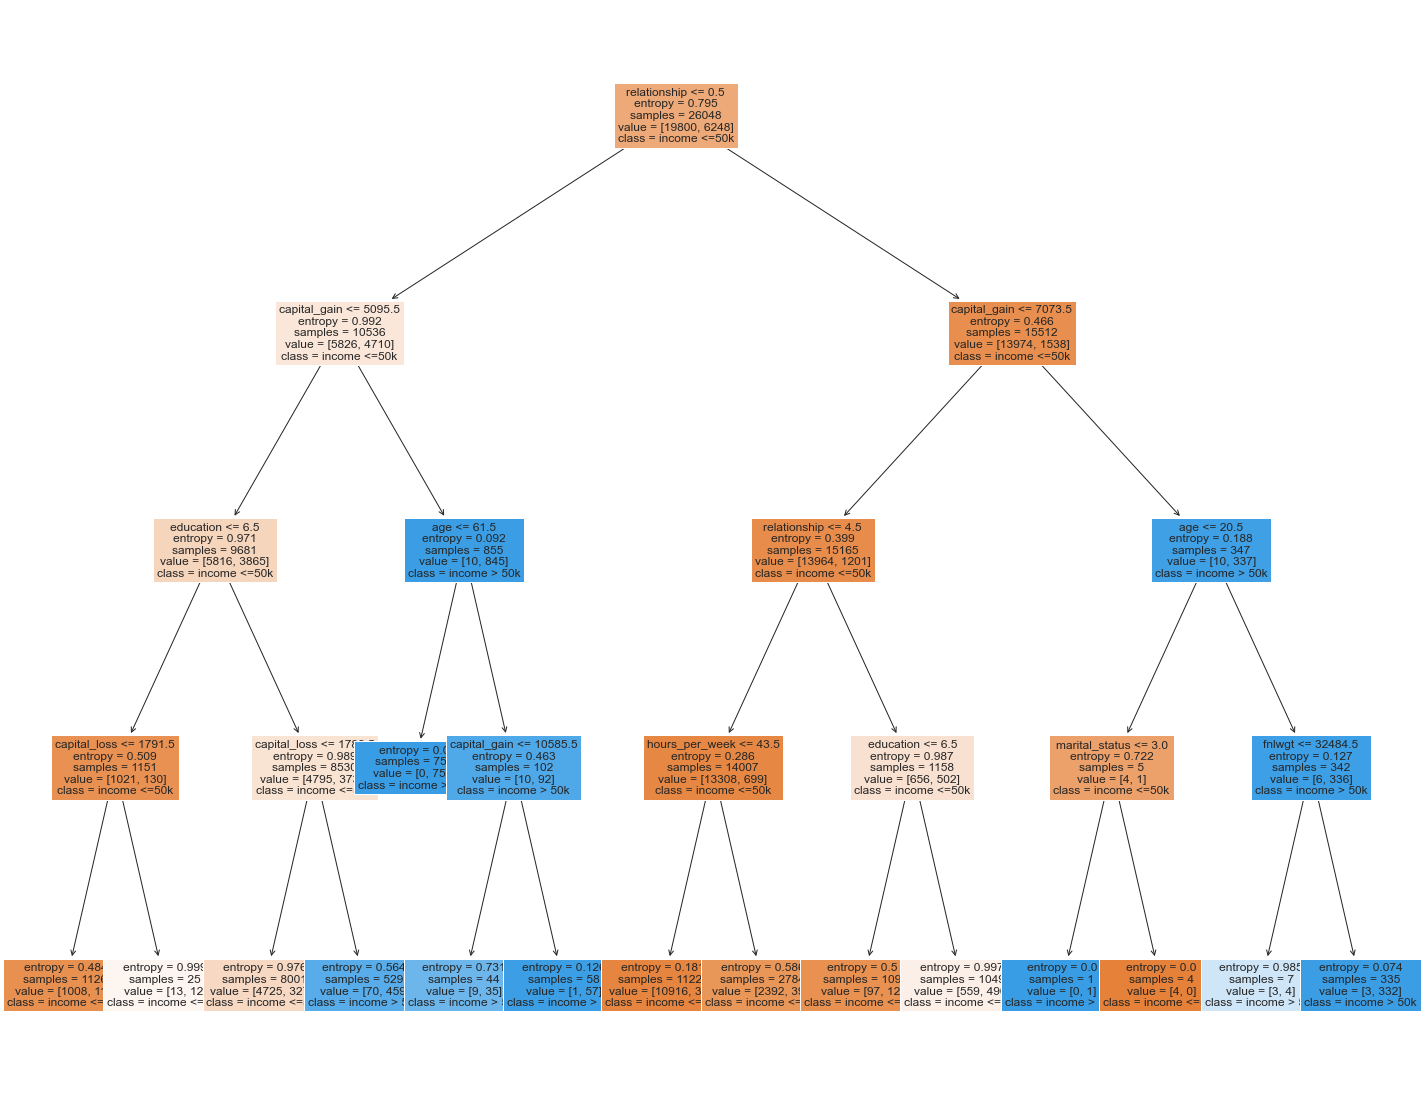

In [103]:
# Decision tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(D_tree, feature_names=feature_names, 
class_names={0: "income <=50k", 1: "income > 50k"},filled=True, fontsize=12)

### optimizing Decision Tree Algorithm by pruning the leaf

In [105]:
D_tree = tree.DecisionTreeClassifier(criterion = "entropy", 
                                     max_depth = 4, 
                                     ccp_alpha=0.01)     # criterion = "entropy", max_depth = 3,entropy, gini
D_tree = D_tree.fit(X_train, y_train)
y_pred = D_tree.predict(X_test)

# model accuracy

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8154460310148933


# Random Forest Algorithm

In [106]:
# Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# Create a Gaussian Classifier
forest = RandomForestClassifier(n_estimators=100, random_state=2)

# Train the model using the training sets y_pred = predict(X_test)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=2)

In [107]:
y_pred_forest = forest.predict(X_test)
y_pred_forest

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [108]:
# Check accuracy of the model
from sklearn import metrics

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.856


<AxesSubplot:>

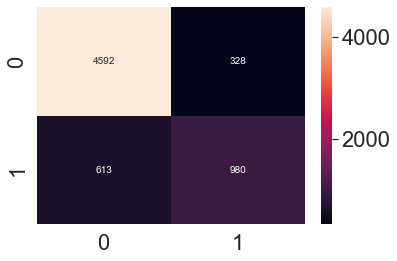

In [109]:
# confusion mattrix

mat_forest = confusion_matrix(y_test, y_pred_forest)
mat_forest

sns.heatmap(mat_forest, annot=True, fmt = "d")

Text(20.5, 0.5, 'Predicted label')

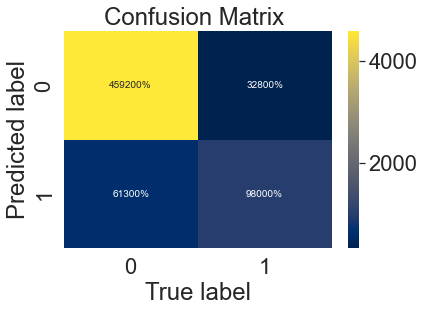

In [110]:
sns.heatmap(mat_forest, annot=True, fmt=".0%", cmap="cividis")
plt.title("Confusion Matrix ")
plt.xlabel("True label")
plt.ylabel("Predicted label")

<AxesSubplot:>

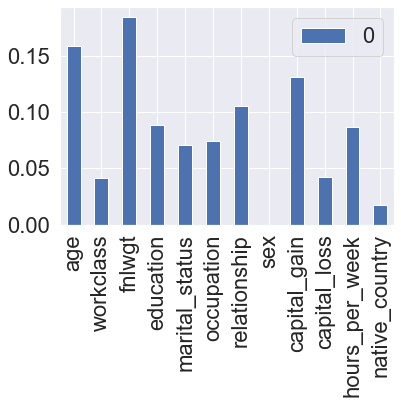

In [111]:
# feature importance

feature_names = X.columns
forest.feature_importances_
feature_importance = pd.DataFrame(forest.feature_importances_, index=feature_names)
feature_importance

# plot of feature importance 
feature_importance.plot(kind="bar")

### hyperparameter tuning for random forest


In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import metrics

In [113]:
forest_tuned = RandomForestClassifier(class_weight='balanced',
                                      criterion='gini',
                                      max_depth=55,
                                      max_features='log2',
                                      min_samples_leaf=0.005,
                                      min_samples_split=0.005,
                                      n_estimators=190)
forest_tuned.fit(X,y)
print('AUC Score = {:.4f}'.format(metrics.roc_auc_score(y, forest_tuned.predict(X))))

AUC Score = 0.8150


# support vector machine

In [114]:
# Import svm model
from sklearn import svm

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2, random_state = 100)

In [115]:
plt.scatter(X_train[:, 0], X_train)[:, 1], c = y_train, cmap = 'winter')

SyntaxError: unmatched ')' (Temp/ipykernel_17608/3724927776.py, line 1)

In [116]:
# create a svm Classifier
svm_clf = svm.SVC(kernel = "linear") # Linear Kernel

# Train the model using the training set
svm_clf.fit(X_train, y_train)

SVC(kernel='linear')

In [117]:
# Predict the response for the dataset
y_pred = svm_clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [118]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7961001074773529


In [119]:
# confusion matrix
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[4763,  157],
       [1171,  422]], dtype=int64)

<AxesSubplot:>

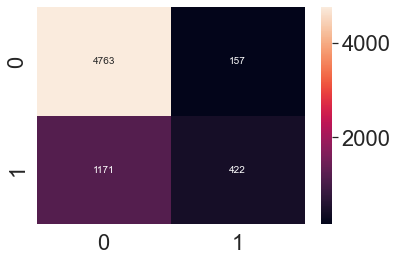

In [120]:
sns.heatmap(matrix, annot=True, fmt = "d")  #d

In [121]:
# create a svm Classifier
svm_clf = svm.SVC(C=2, gamma=0.5, kernel = "linear") # Linear Kernel

# Train the model using the training set
svm_clf.fit(X_train, y_train)

SVC(C=2, gamma=0.5, kernel='linear')

In [122]:
# Predict the response for the dataset
y_pred = svm_clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7994779671426377


In [123]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=100_000, n_features=20, n_informative=2, n_redundant=2, random_state=42
)

train_samples = 100  # Samples used for training the models
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    shuffle=False,
    test_size=100_000 - train_samples,
)

In [124]:
from sklearn.svm import LinearSVC


class NaivelyCalibratedLinearSVC(LinearSVC):
    """LinearSVC with `predict_proba` method that naively scales
    `decision_function` output."""

    def fit(self, X, y):
        super().fit(X, y)
        df = self.decision_function(X)
        self.df_min_ = df.min()
        self.df_max_ = df.max()

    def predict_proba(self, X):
        """Min-max scale output of `decision_function` to [0,1]."""
        df = self.decision_function(X)
        calibrated_df = (df - self.df_min_) / (self.df_max_ - self.df_min_)
        proba_pos_class = np.clip(calibrated_df, 0, 1)
        proba_neg_class = 1 - proba_pos_class
        proba = np.c_[proba_neg_class, proba_pos_class]
        return proba

In [130]:
from sklearn.calibration import CalibrationDisplay
#from sklearn.calibration import calibration_curve, CalibrationDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree

# Create classifiers
lr = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier()
dt = tree.DecisionTreeClassifier() 
rfc = RandomForestClassifier()
svc = NaivelyCalibratedLinearSVC(C=1.0)


clf_list = [
    (lr, "Logistic"),
    (nb, "Naive Bayes"),
    (knn, "KNN"),
    (dt, "Decision Tree"),
    (rfc, "Random forest"),
    (svc, "SVC")
]

ImportError: cannot import name 'CalibrationDisplay' from 'sklearn.calibration' (C:\Users\hensh\anaconda3\lib\site-packages\sklearn\calibration.py)

NameError: name 'clf_list' is not defined

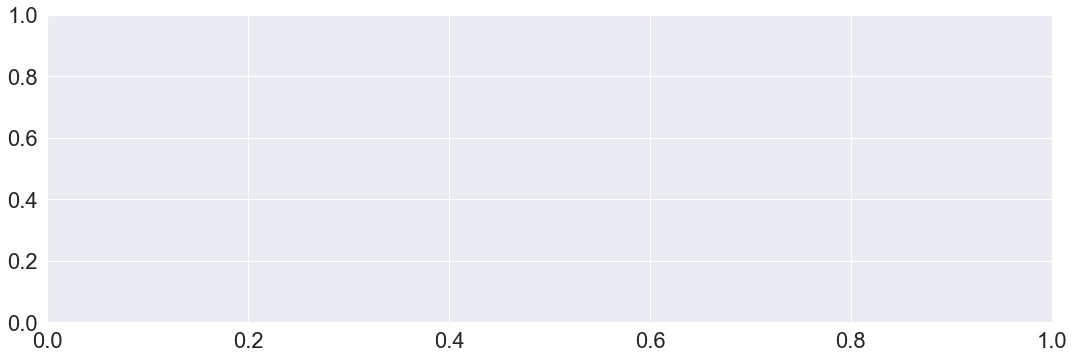

In [126]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(18, 18)) #9, 12  [6.4, 4.8]
gs = GridSpec(6, 2)
colors = plt.cm.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
for i, (clf_list, name) in enumerate(clf_list):
    clf.fit(X_train, y_train)
    display = CalibrationDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        n_bins=10,   #6
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Add histogram
grid_positions = [(1, 0), (1, 1), (2, 0), (2, 1), (3, 0), (3, 1)]
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()

# Clustering Algorithm

## K - Means

In [131]:
# selected variable for clustering analysis

clus_data = df_copy.drop(["education", "workclass", "marital_status", "occupation", 
                          "relationship", "sex", "native_country", "income"], axis = 1)
clus_data

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,90,77053,9,0,4356,40
1,82,132870,9,0,4356,18
2,66,186061,10,0,4356,40
3,54,140359,4,0,3900,40
4,41,264663,10,0,3900,40
...,...,...,...,...,...,...
32556,22,310152,10,0,0,40
32557,27,257302,12,0,0,38
32558,40,154374,9,0,0,40
32559,58,151910,9,0,0,40


In [132]:
# considering that the variable have several outlier and the some have more representation than the other
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
clus_data_norm = sc.fit_transform(clus_data)
pd.DataFrame(clus_data_norm)

,0,1,2,3,4,5
0,3.769612,-1.067997,-0.420060,-0.14592,10.593507,-0.035429
1,3.183112,-0.539169,-0.420060,-0.14592,10.593507,-1.817204
2,2.010110,-0.035220,-0.031360,-0.14592,10.593507,-0.035429
3,1.130359,-0.468215,-2.363558,-0.14592,9.461864,-0.035429
4,0.177296,0.709482,-0.031360,-0.14592,9.461864,-0.035429
...,...,...,...,...,...,...
32556,-1.215643,1.140460,-0.031360,-0.14592,-0.216660,-0.035429
32557,-0.849080,0.639741,0.746039,-0.14592,-0.216660,-0.197409
32558,0.103983,-0.335433,-0.420060,-0.14592,-0.216660,-0.035429
32559,1.423610,-0.358777,-0.420060,-0.14592,-0.216660,-0.035429


In [133]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5, random_state = 42)     # choosing a cluster of 5
y_kmeans = kmeans.fit_predict(clus_data_norm)
y_kmeans

array([2, 2, 2, ..., 4, 4, 1])

In [134]:
# getting the cluster centers
kmeans.cluster_centers_

array([[ 0.05452353, -0.18795067,  0.87632587,  0.01563898, -0.21460128,
         0.65120299],
       [-0.79502912,  0.29037455, -0.39685003, -0.11930032, -0.21577082,
        -0.39068232],
       [ 0.22378302, -0.0400633 ,  0.35288681, -0.14592048,  4.50275609,
         0.23646477],
       [ 0.57014051,  0.03022804,  1.10295829, 13.39457791, -0.21665953,
         0.75816838],
       [ 1.12717928, -0.21535879, -0.55168581, -0.06805917, -0.21431945,
        -0.25381738]])

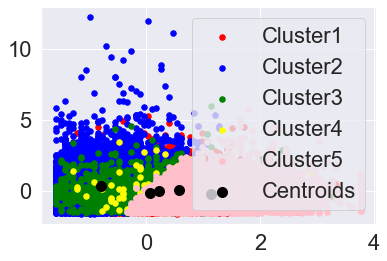

In [135]:
import matplotlib.pyplot as plt
plt.scatter(clus_data_norm[y_kmeans == 0, 0], clus_data_norm[y_kmeans == 0, 1], s = 30, c = "red", label = "Cluster1")
plt.scatter(clus_data_norm[y_kmeans == 1, 0], clus_data_norm[y_kmeans == 1, 1], s = 30, c = "blue", label = "Cluster2")
plt.scatter(clus_data_norm[y_kmeans == 2, 0], clus_data_norm[y_kmeans == 2, 1], s = 30, c = "green", label = "Cluster3")
plt.scatter(clus_data_norm[y_kmeans == 3, 0], clus_data_norm[y_kmeans == 3, 1], s = 30, c = "yellow", label = "Cluster4")
plt.scatter(clus_data_norm[y_kmeans == 4, 0], clus_data_norm[y_kmeans == 4, 1], s = 30, c = "pink", label = "Cluster5")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = "black", label = "Centroids")
plt.legend()
plt.show()

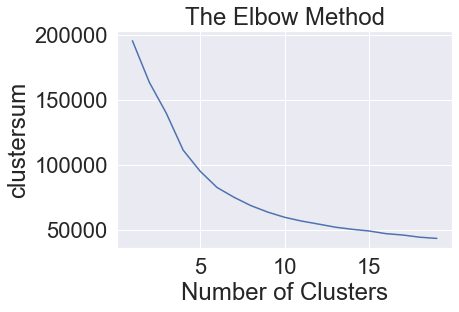

In [137]:
# Apply Elbow method to find optimal number of cluster
clustersum = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(clus_data_norm)
    clustersum.append(kmeans.inertia_)
plt.plot(range(1, 20), clustersum)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("clustersum")
plt.show()

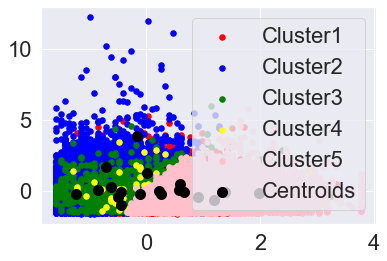

In [139]:
#K = 5 from the elbow plot
plt.scatter(clus_data_norm[y_kmeans == 0, 0], clus_data_norm[y_kmeans == 0, 1], s = 30, c = "red", label = "Cluster1")
plt.scatter(clus_data_norm[y_kmeans == 1, 0], clus_data_norm[y_kmeans == 1, 1], s = 30, c = "blue", label = "Cluster2")
plt.scatter(clus_data_norm[y_kmeans == 2, 0], clus_data_norm[y_kmeans == 2, 1], s = 30, c = "green", label = "Cluster3")
plt.scatter(clus_data_norm[y_kmeans == 3, 0], clus_data_norm[y_kmeans == 3, 1], s = 30, c = "yellow", label = "Cluster4")
plt.scatter(clus_data_norm[y_kmeans == 4, 0], clus_data_norm[y_kmeans == 4, 1], s = 30, c = "pink", label = "Cluster5")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = "black", label = "Centroids")
plt.legend()
plt.show()

In [ ]:
plt.scatter(df_scaled[y_kmeans == 0, 0], df_scaled[y_kmeans == 0, 1], s = 60, c = "red", label = "Cluster1")
plt.scatter(df_scaled[y_kmeans == 1, 0], df_scaled[y_kmeans == 1, 1], s = 60, c = "blue", label = "Cluster2")
#plt.scatter(df_scaled[y_kmeans == 2, 0], df_scaled[y_kmeans == 2, 1], s = 60, c = "green", label = "Cluster3")
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = "black", label = "Centroids")
#plt.legend()
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


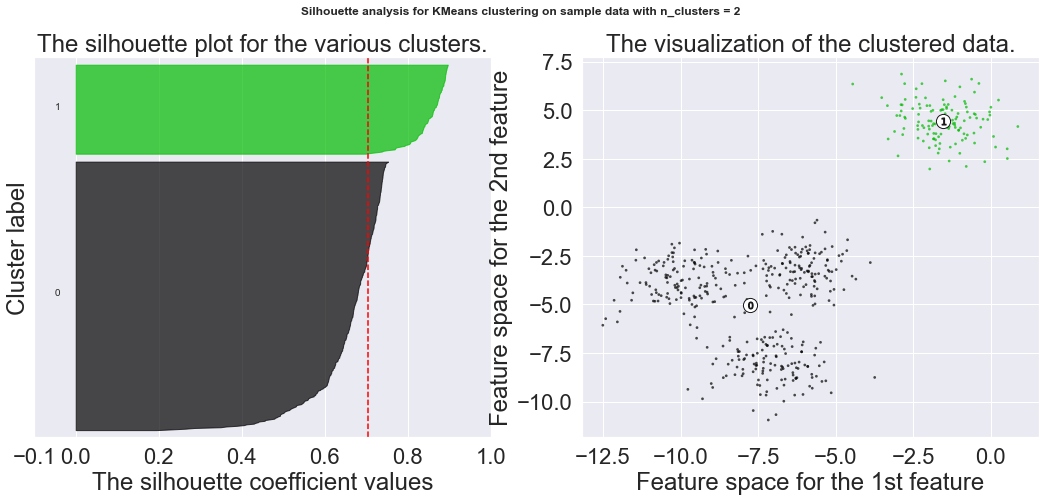

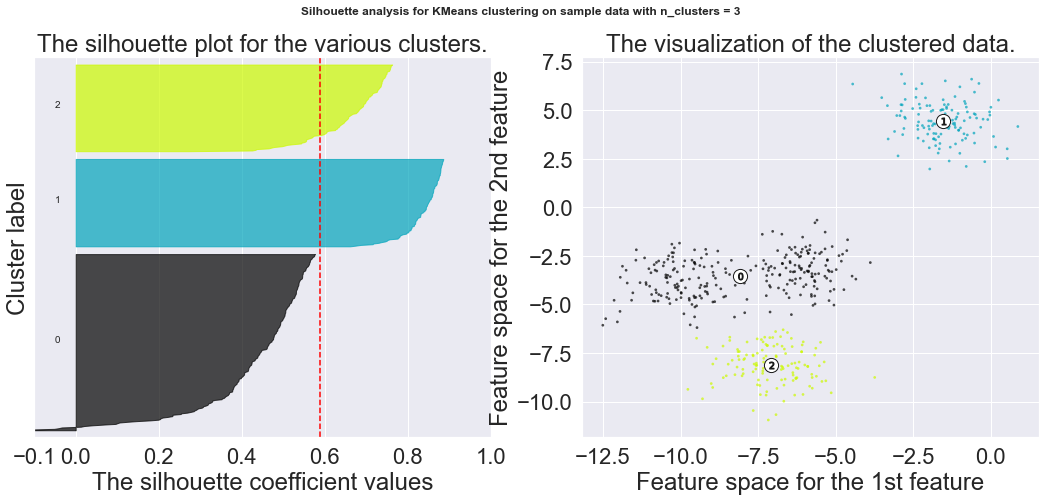

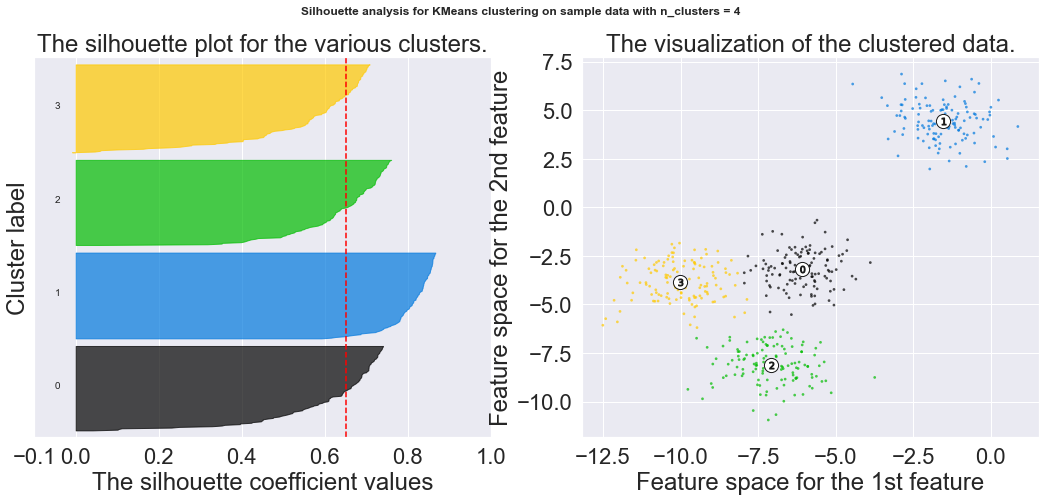

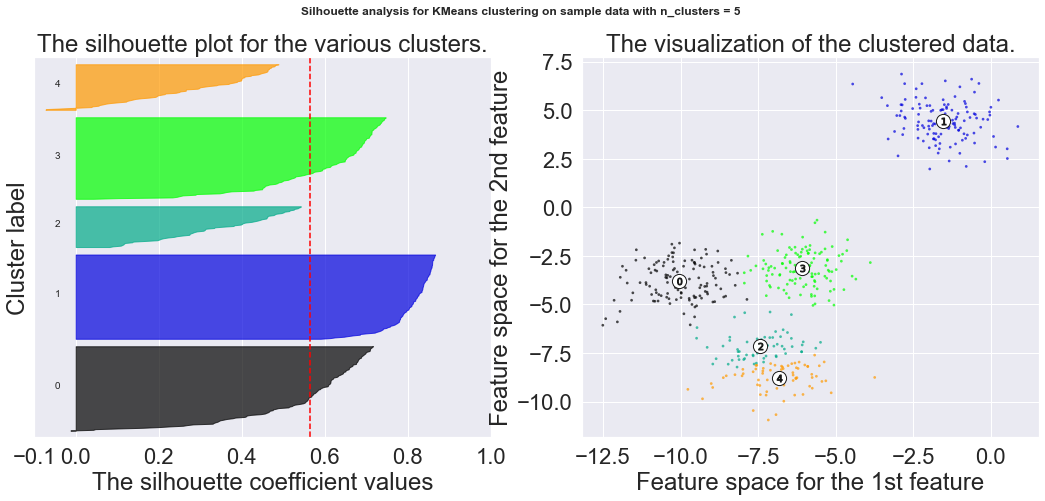

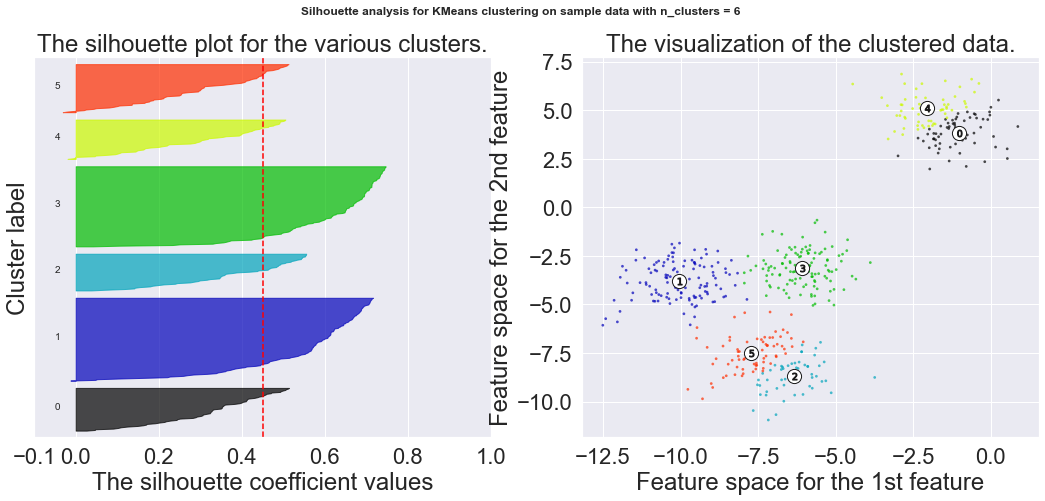

In [140]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=12,
        fontweight="bold",
    )

plt.show()

# HIERARCHICAL CLUSTERING

In [141]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

In [142]:
clus_data = df_copy.drop(["education", "workclass", "marital_status", "occupation", 
                          "relationship", "sex", "native_country", "income"], axis = 1)
clus_data

# considering that the variable have several outlier and the some have more representation than the other
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
clus_data_norm = sc.fit_transform(clus_data)
pd.DataFrame(clus_data_norm)

,0,1,2,3,4,5
0,3.769612,-1.067997,-0.420060,-0.14592,10.593507,-0.035429
1,3.183112,-0.539169,-0.420060,-0.14592,10.593507,-1.817204
2,2.010110,-0.035220,-0.031360,-0.14592,10.593507,-0.035429
3,1.130359,-0.468215,-2.363558,-0.14592,9.461864,-0.035429
4,0.177296,0.709482,-0.031360,-0.14592,9.461864,-0.035429
...,...,...,...,...,...,...
32556,-1.215643,1.140460,-0.031360,-0.14592,-0.216660,-0.035429
32557,-0.849080,0.639741,0.746039,-0.14592,-0.216660,-0.197409
32558,0.103983,-0.335433,-0.420060,-0.14592,-0.216660,-0.035429
32559,1.423610,-0.358777,-0.420060,-0.14592,-0.216660,-0.035429


KeyboardInterrupt: 

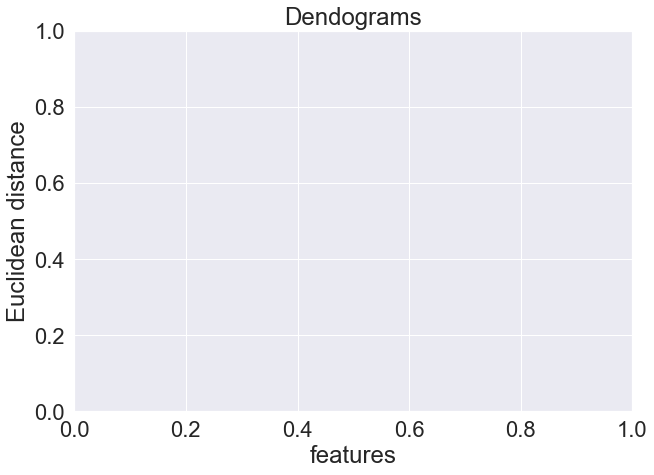

In [143]:
# ploting dendogram
plt.figure(figsize=(10, 7))
plt.title("Dendograms")
plt.ylabel("Euclidean distance")
plt.xlabel("features")
dendogram = dendrogram(linkage(clus_data_norm, method = "ward"))
plt.axhline(y=30, color="r", linestyle="--")

In [144]:
# Apply agglomerative algorithm in sklearn for clustering
from sklearn.cluster import AgglomerativeClustering 
cluster = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean", linkage ="ward")

Agg_pred = cluster.fit_predict(clus_data_norm)
Agg_pred

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [150]:
silhouette_score(clus_data_norm, Agg_pred)

0.5121636037396329

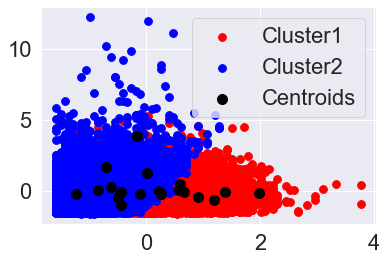

In [146]:
plt.scatter(clus_data_norm[y_kmeans == 0, 0], clus_data_norm[y_kmeans == 0, 1], s = 60, c = "red", label = "Cluster1")
plt.scatter(clus_data_norm[y_kmeans == 1, 0], clus_data_norm[y_kmeans == 1, 1], s = 60, c = "blue", label = "Cluster2")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = "black", label = "Centroids")
plt.legend()
plt.show()

## DBSCAN - Density-Based Spatial Clustering of Applications with Noise.

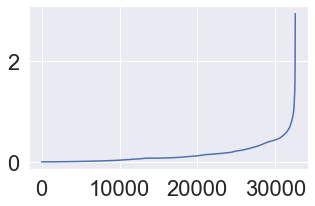

Maximum curvature at 7 to 8


In [147]:
from sklearn.neighbors import NearestNeighbors

nearneigh = NearestNeighbors(n_neighbors = 2)
neighbors = nearneigh.fit(clus_data_norm)
distances, indices = nearneigh.kneighbors(clus_data_norm)
distances = np.sort(distances, axis = 0)
distances = distances[:, 1]
plt.rcParams["figure.figsize"] = (5,3)
plt.plot(distances)
plt.show()

print("Maximum curvature at 7 to 8")

In [151]:
# Implementing DBSCAN (Eps is 7)
from sklearn.cluster import DBSCAN
# cluster the data into 5 clusters
dbscan = DBSCAN(eps = 7, min_samples = 4).fit(clus_data_norm)
labels = dbscan.labels_
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

No handles with labels found to put in legend.


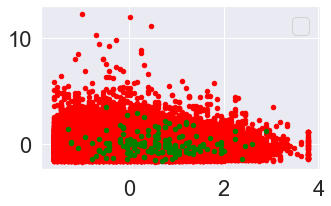

In [155]:
plt.scatter(clus_data_norm[labels == -1, 0], clus_data_norm[labels == -1, 1], s = 20, c = "black")

plt.scatter(clus_data_norm[labels == 0, 0], clus_data_norm[labels == 0, 1], s = 20, c = "red")
plt.scatter(clus_data_norm[labels == 1, 0], clus_data_norm[labels == 1, 1], s = 20, c = "green")
plt.scatter(clus_data_norm[labels == 2, 0], clus_data_norm[labels == 2, 1], s = 20, c = "orange")
plt.scatter(clus_data_norm[labels == 3, 0], clus_data_norm[labels == 3, 1], s = 20, c = "blue")
plt.legend()
plt.show()

# ANN classification problem

In [161]:
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

In [164]:
#X = df_copy.drop(["education_num", "income"], axis = 1)
y = df_copy.income  
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2, random_state = 100)

In [169]:
X_train.shape

(26048, 11)

<AxesSubplot:>

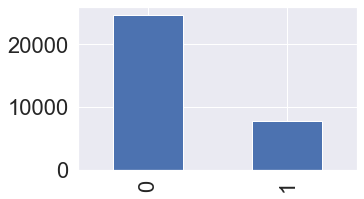

In [168]:
df_copy["income"].value_counts().plot(kind="bar")

In [179]:
# defining the keras model layer by layer
ann = Sequential() #initializing model

#adding the first layer
ann.add(Dense(12, input_dim = 11, activation="relu"))

#second hidden layer
ann.add(Dense(11, activation="relu"))

# output layer using sigmoid since output is binary
ann.add(Dense(1, activation="sigmoid"))

In [180]:
# compiling the model
ann.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [181]:
# fitting the model
ann.fit(X_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
2605/2605 [==============================] - 6s 2ms/step - loss: 0.4238 - accuracy: 0.7904
Epoch 2/100
2605/2605 [==============================] - 6s 2ms/step - loss: 0.3682 - accuracy: 0.8139
Epoch 3/100
  33/2605 [..............................] - ETA: 8s - loss: 0.3926 - accuracy: 0.8030

KeyboardInterrupt: 

In [182]:
# train accuracy
_, accuracy = ann.evaluate(X_train, y_train)
print('Train Accuracy: %.2f' % (accuracy*100))

814/814 [==============================] - 2s 2ms/step - loss: 0.3623 - accuracy: 0.8186
Train Accuracy: 81.86


In [178]:
# test accuracy
from sklearn.metrics import accuracy_score
y_pred_ANN = model.predict_classes(X_test)

accuracy_score(y_test, y_pred_ANN)

AttributeError: 'GaussianNB' object has no attribute 'predict_classes'

In [183]:
loss, accuracy = ann.evaluate(X_test, y_test)

print("Test Accuracy: %.2f" % (accuracy*100))

204/204 [==============================] - 1s 2ms/step - loss: 0.3596 - accuracy: 0.8224
Test Accuracy: 82.24
